# Case study on Unsupervised Learning
Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
   the optimum number of clusters.

In [1]:
## Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore") 

1.Read the dataset to the python environment

In [2]:
data=pd.read_csv('Wine.csv')
data.head()


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
data.shape

(178, 13)

In [4]:
%whos

Variable   Type         Data/Info
---------------------------------
data       DataFrame         Alcohol  Malic_Acid <...>\n[178 rows x 13 columns]
np         module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd         module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt        module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
sns        module       <module 'seaborn' from 'C<...>s\\seaborn\\__init__.py'>
warnings   module       <module 'warnings' from '<...>onda3\\lib\\warnings.py'>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

No null values,the dataset is clean

In [7]:
data.describe() ## Statistical summary

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Checking for outliers

In [8]:
numcols = data.dtypes[(data.dtypes=='int64') | (data.dtypes=='float64')].index

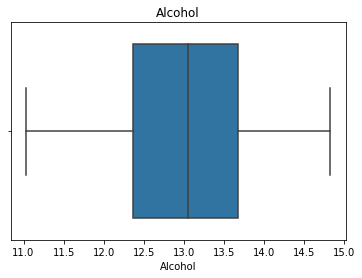

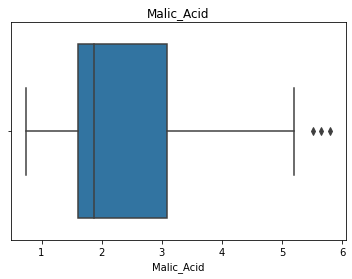

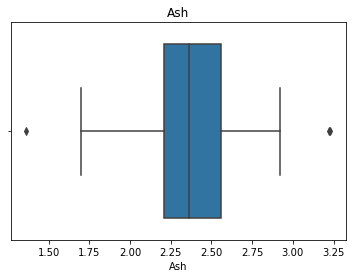

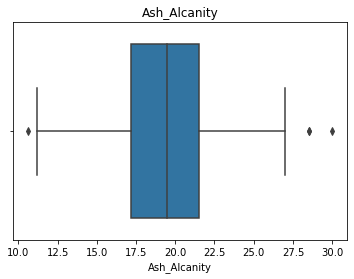

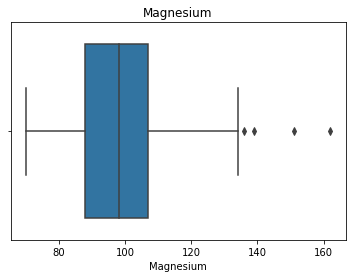

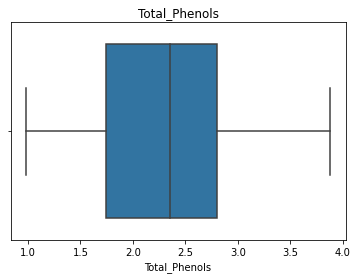

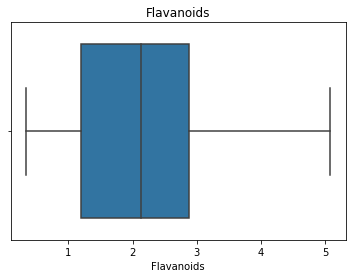

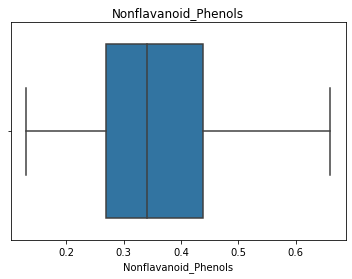

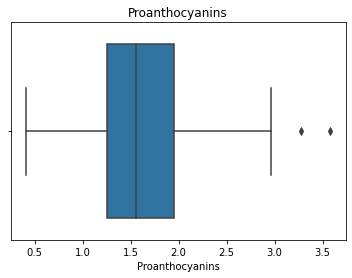

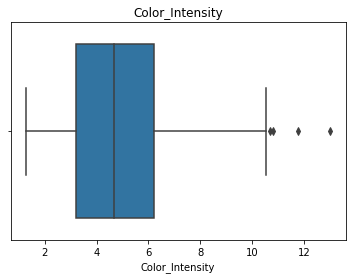

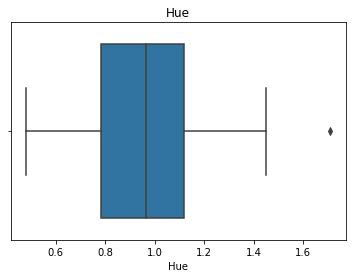

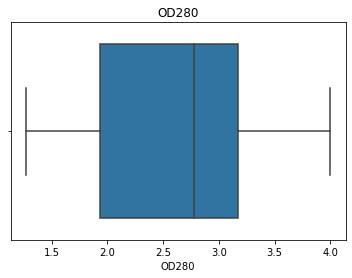

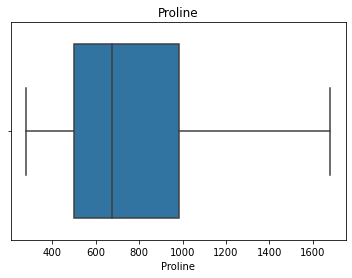

In [9]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

In [10]:
for x in numcols:
    print(x)
    descr = data[x].describe()
    IQR = descr['75%'] - descr['25%']
    upper_limit =  descr['75%'] + 1.5 * IQR
    lower_limit =  descr['25%'] - 1.5 * IQR  
    #outlier replacement
    data[x][data[x]>upper_limit] = upper_limit
    data[x][data[x]<lower_limit] = lower_limit

Alcohol
Malic_Acid
Ash
Ash_Alcanity
Magnesium
Total_Phenols
Flavanoids
Nonflavanoid_Phenols
Proanthocyanins
Color_Intensity
Hue
OD280
Proline


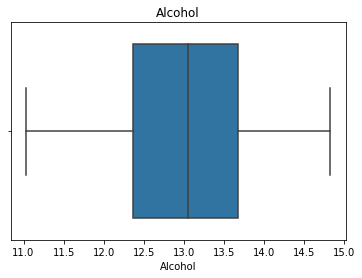

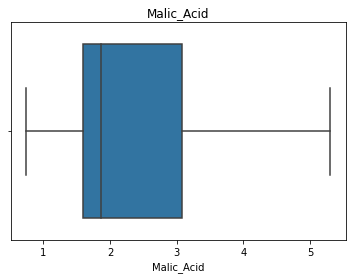

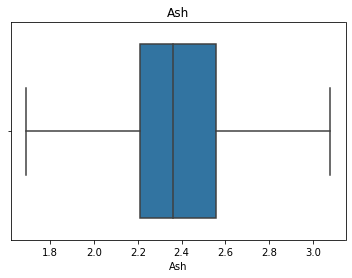

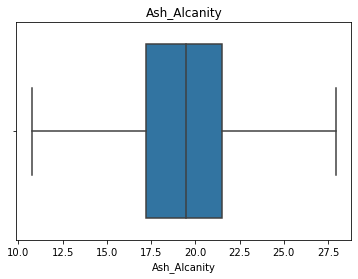

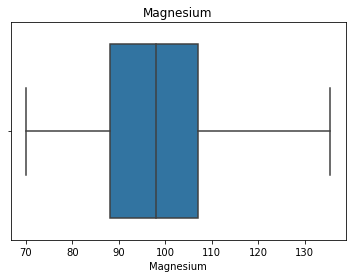

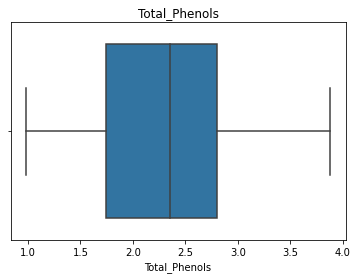

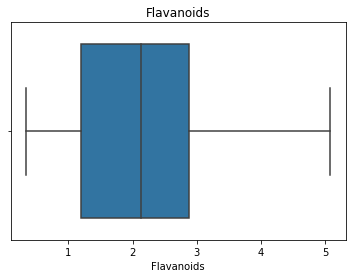

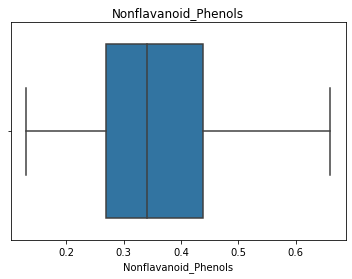

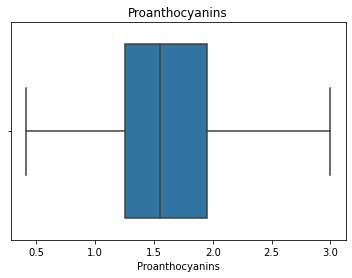

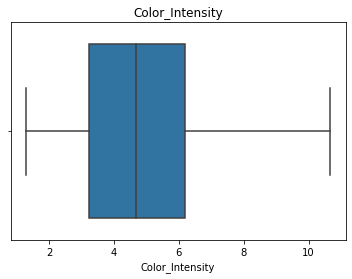

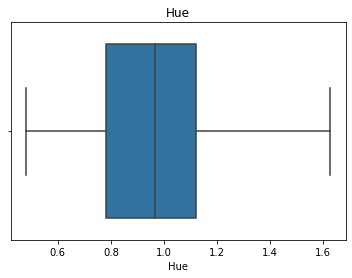

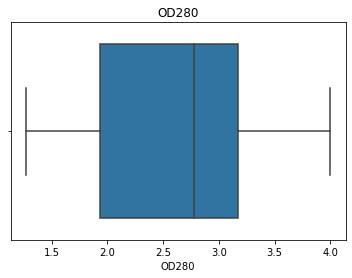

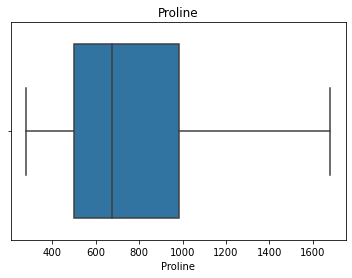

In [11]:
for x in numcols:
    sns.boxplot(data[x],orient='h')
    plt.title(x)
    plt.show()

Outliers are removed

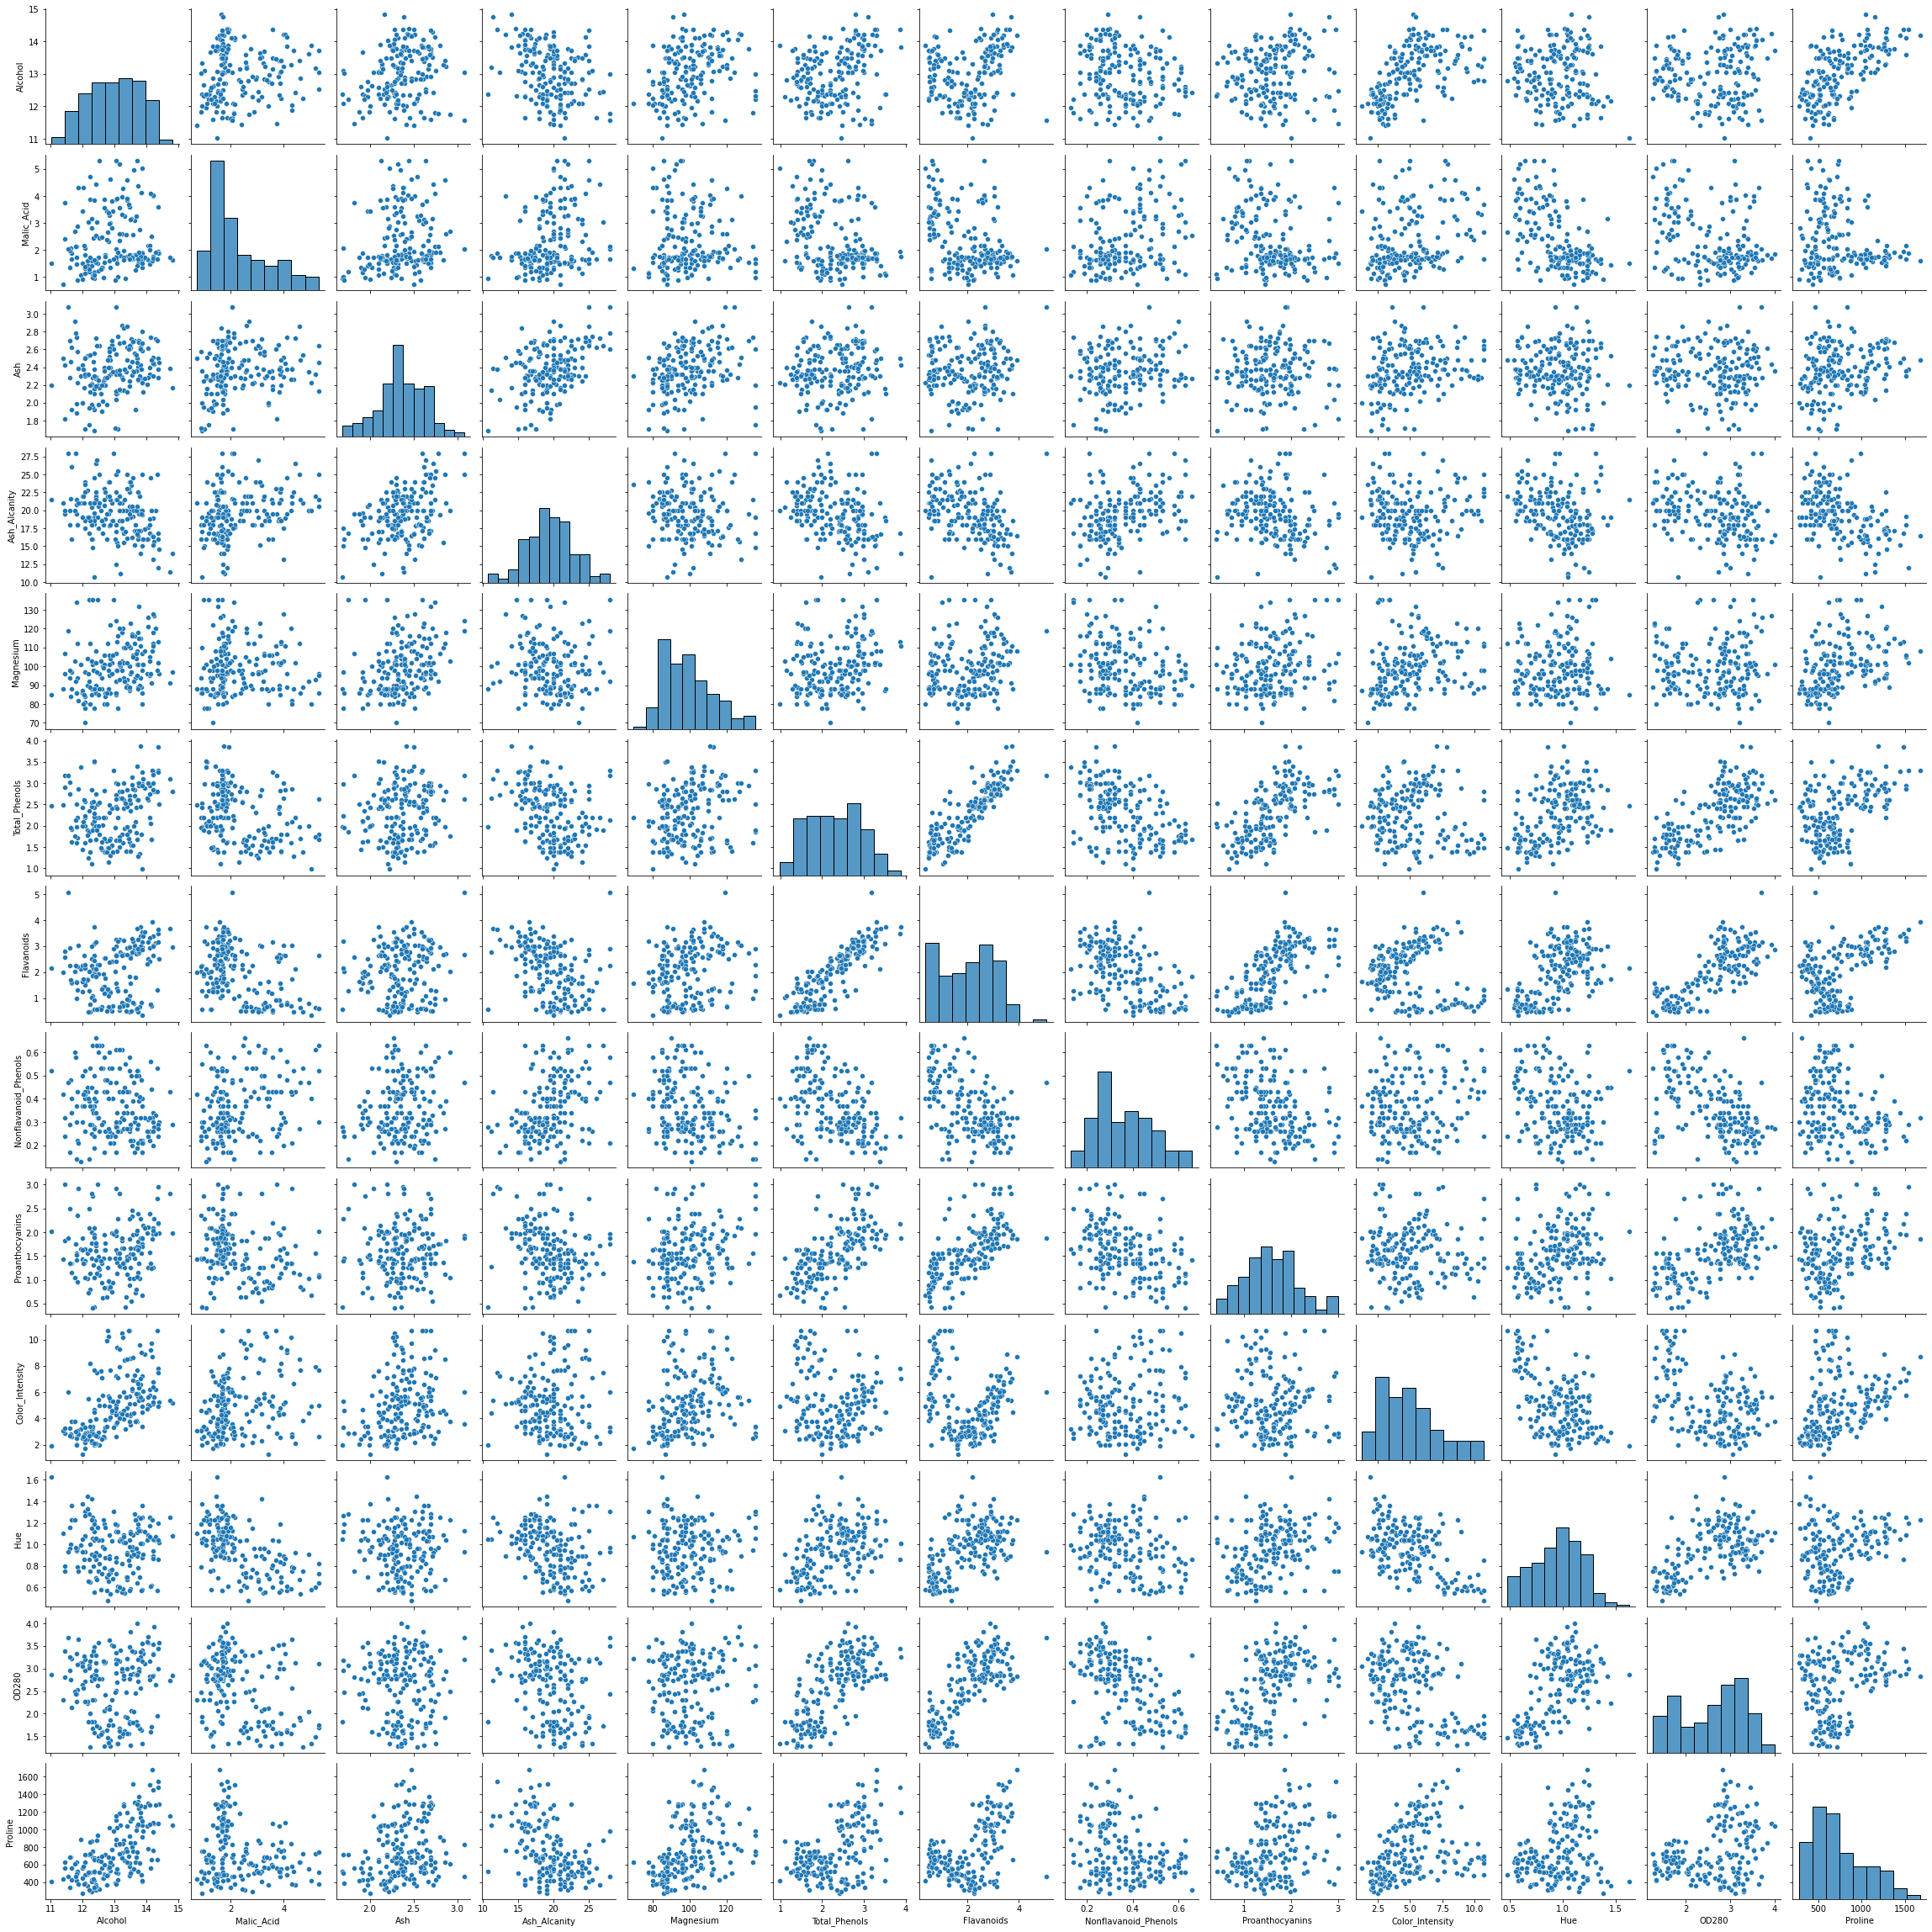

In [12]:
sns.pairplot(data)

clusters are visible from the pairplot

# Normalization

In [13]:
from sklearn.preprocessing import Normalizer
data_norm= pd.DataFrame(Normalizer().fit_transform(data), columns=data.columns)

In [14]:
data_norm.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753


In [15]:
data_norm.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.019951,0.003699,0.003645,0.031103,0.151251,0.003444,0.002973,0.000581,0.002389,0.007311,0.001476,0.003994,0.986070
std,0.007321,0.002458,0.001403,0.014646,0.053976,0.001543,0.001802,0.000327,0.001233,0.003756,0.000732,0.001978,0.010062
min,0.008428,0.000944,0.001473,0.007739,0.064147,0.001255,0.000637,0.000145,0.000554,0.002241,0.000579,0.001675,0.951812
25%,0.013548,0.001684,0.002359,0.017615,0.109775,0.002385,0.001752,0.000277,0.001515,0.004612,0.000970,0.002535,0.981724
50%,0.018984,0.003174,0.003468,0.029883,0.146128,0.002946,0.002721,0.000514,0.002030,0.005981,0.001232,0.003384,0.988575
75%,0.024784,0.004981,0.004506,0.040010,0.183082,0.003886,0.003551,0.000833,0.003040,0.008853,0.001834,0.004870,0.993564
max,0.041106,0.013578,0.007305,0.069703,0.297958,0.008404,0.010560,0.002008,0.007469,0.021613,0.004727,0.010858,0.997835


# K-Means Clustering

Kmeans Algorithm is an Iterative algorithm that divides a group of n datasets into k subgroups /clusters based on the similarity. 

Elbow method- To find the optimum number of clusters

0.5870249164814522
0.20946139168138495
0.10213709068612505
0.05831808543485474
0.03909063651751761
0.030343662684538832
0.0257686928658
0.022884739184728567
0.019669962325693464
0.017960171884653285


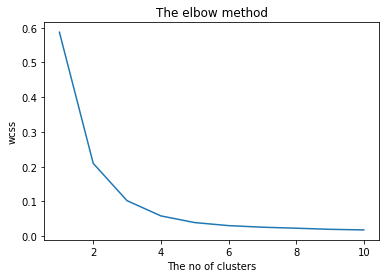

In [16]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_norm)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The no of clusters')
plt.ylabel('wcss')
plt.show()

Optimum no of clusters=3

Creating the model using KMeans with optimum number of clusters

In [17]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(data_norm)
pred_kmeans = model_kmeans.labels_
pred_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       1, 1, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2,
       2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

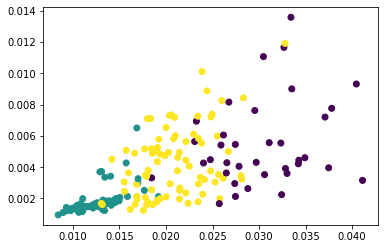

In [18]:
plt.scatter(data_norm.iloc[:,0],data_norm.iloc[:,1],c=pred_kmeans)

In [19]:
output = data_norm.copy()
output["kmeans-cluster"] = pred_kmeans
output.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,1
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,1
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,1
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,1
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2
5,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907,1
6,0.011123,0.001445,0.001894,0.011285,0.074203,0.001932,0.001948,0.000232,0.001530,0.004058,0.000788,0.002767,0.997097,1
7,0.010808,0.001653,0.002006,0.013530,0.093015,0.001999,0.001929,0.000238,0.000961,0.003882,0.000815,0.002752,0.995495,1
8,0.014128,0.001562,0.002067,0.013337,0.092405,0.002667,0.002839,0.000276,0.001886,0.004954,0.001029,0.002715,0.995503,1
9,0.013202,0.001286,0.002162,0.015240,0.093347,0.002839,0.003000,0.000210,0.001762,0.006877,0.000962,0.003381,0.995386,1


# Hierarchial clustering

Agglomerative clustering

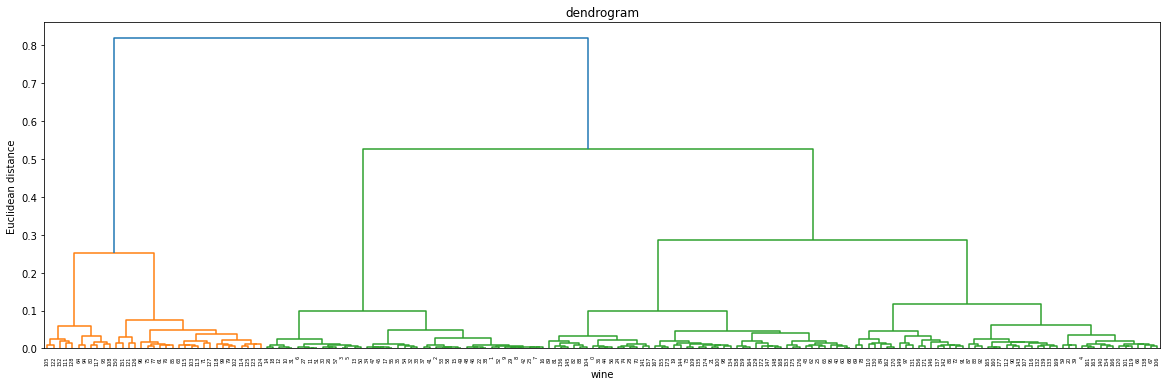

In [20]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (20, 6))
dendrogram=sch.dendrogram(sch.linkage(data_norm,method='ward'))
plt.title('dendrogram')
plt.xlabel('wine')
plt.ylabel('Euclidean distance')
plt.show()

Optimum number of clusters=3
HC with optimum number of clusters

In [21]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(data_norm)

HC_clusters = model_hc.labels_
HC_clusters

array([0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

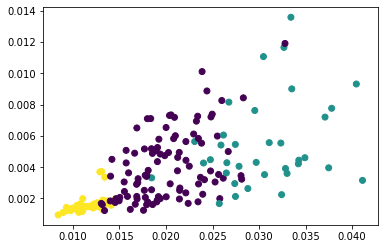

In [22]:
plt.scatter(data_norm.iloc[:,0],data_norm.iloc[:,1],c=HC_clusters)

In [23]:
output["agg-cluster"] = HC_clusters
output.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster,agg-cluster
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,1,0
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,1,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,1,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,1,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2,0


# PCA

In [24]:
from sklearn.preprocessing import StandardScaler
data_std = pd.DataFrame(StandardScaler().fit_transform(data),columns=data.columns, index = data.index)

In [25]:
data_std.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.565534,0.240640,-1.182882,2.057111,0.808997,1.034819,-0.659563,1.264740,0.266954,0.366610,1.847920,1.013009
1,0.246290,-0.501728,-0.862176,-2.524956,0.038639,0.568648,0.733629,-0.820719,-0.549904,-0.291923,0.410768,1.113449,0.965242
2,0.196879,0.026948,1.153315,-0.267832,0.113397,0.808997,1.215533,-0.498407,2.199012,0.284696,0.322451,0.788587,1.395148
3,1.691550,-0.346771,0.506837,-0.816862,1.010496,2.491446,1.466525,-0.981875,1.067105,1.225029,-0.428246,1.184071,2.334574
4,0.295700,0.236596,1.913878,0.464208,1.384287,0.808997,0.663351,0.226796,0.420301,-0.318536,0.366610,0.449601,-0.037874


In [26]:
from sklearn.decomposition import PCA


In [27]:
pca = PCA(n_components=13)
data_pca = pca.fit_transform(data_std)

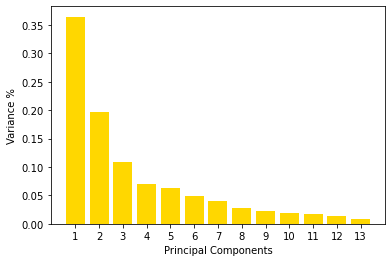

In [28]:
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(data_pca)

Taking number of components as 2

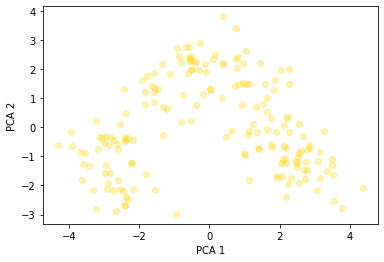

In [29]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

PCA has helped  to reduce the dimension of our data

KMeans with PCA

2314.0
1654.9060813507995
1266.0703462093165
1166.655523051511
1100.443347725762
1038.9752205548023
986.1928769323873
948.5899235835221
908.9037567420926
875.0793869435358


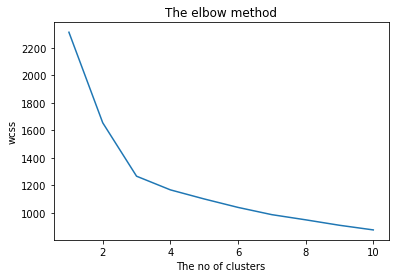

In [30]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The elbow method')
plt.xlabel('The no of clusters')
plt.ylabel('wcss')
plt.show()

 Optimum No of clusters=3

In [31]:
cluster_Kmeans = KMeans(n_clusters=3)
model_kmeans = cluster_Kmeans.fit(data_pca)
kmeans_pca = model_kmeans.labels_
kmeans_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

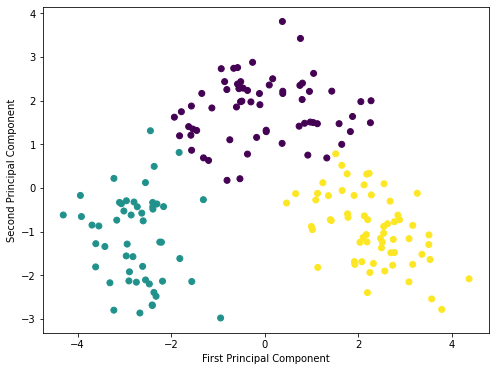

In [32]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c =kmeans_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [33]:
output["pca-kmeans-cluster"] = kmeans_pca
output.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster,agg-cluster,pca-kmeans-cluster
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,1,0,2
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,1,2,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,1,2,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,1,2,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2,0,2


 Agglomerative Clustering with PCA

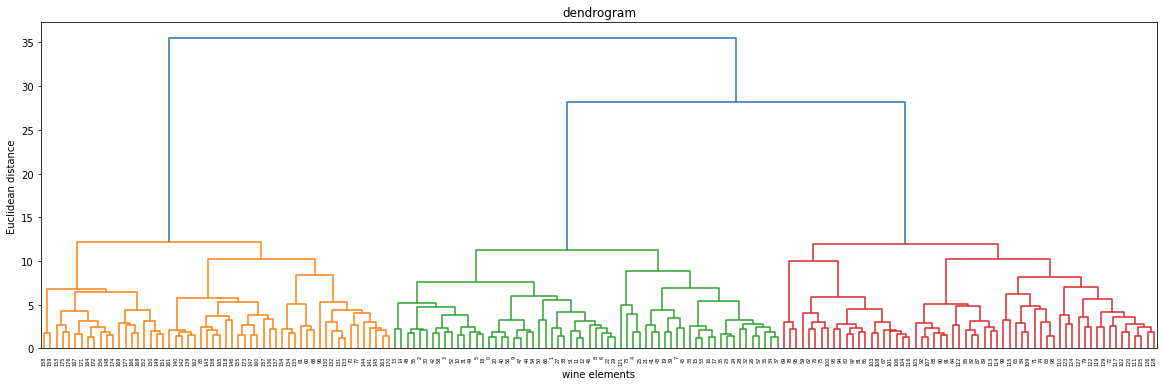

In [34]:

plt.figure(figsize = (20, 6))
dendrogram=sch.dendrogram(sch.linkage(data_pca,method='ward'))
plt.title('dendrogram')
plt.xlabel('wine elements')
plt.ylabel('Euclidean distance')
plt.show()

In [35]:

hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")

model_hc = hc.fit(data_pca)

hc_pca= model_hc.labels_
hc_pca

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

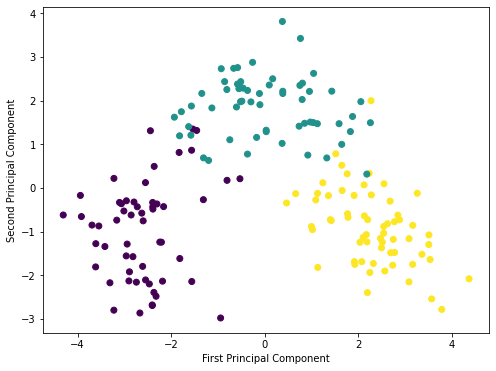

In [36]:
plt.figure(figsize =(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c =hc_pca)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

In [37]:
output["agg_pca"] = hc_pca
output.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,kmeans-cluster,agg-cluster,pca-kmeans-cluster,agg_pca
0,0.013264,0.001594,0.002265,0.014542,0.118383,0.002610,0.002852,0.000261,0.002135,0.005257,0.000969,0.003654,0.992738,1,0,2,2
1,0.012513,0.001687,0.002029,0.010617,0.094794,0.002512,0.002616,0.000246,0.001213,0.004152,0.000995,0.003223,0.995336,1,2,2,2
2,0.011063,0.001984,0.002245,0.015636,0.084906,0.002354,0.002724,0.000252,0.002362,0.004775,0.000866,0.002665,0.996176,1,2,2,2
3,0.009680,0.001314,0.001684,0.011317,0.076119,0.002593,0.002351,0.000162,0.001468,0.005254,0.000579,0.002324,0.996961,1,2,2,2
4,0.017775,0.003477,0.003853,0.028193,0.158418,0.003759,0.003611,0.000524,0.002443,0.005800,0.001396,0.003934,0.986753,2,0,2,2
5,0.009763,0.001210,0.001684,0.010450,0.077002,0.002248,0.002331,0.000234,0.001354,0.004641,0.000722,0.001959,0.996907,1,2,2,2
6,0.011123,0.001445,0.001894,0.011285,0.074203,0.001932,0.001948,0.000232,0.001530,0.004058,0.000788,0.002767,0.997097,1,2,2,2
7,0.010808,0.001653,0.002006,0.013530,0.093015,0.001999,0.001929,0.000238,0.000961,0.003882,0.000815,0.002752,0.995495,1,2,2,2
8,0.014128,0.001562,0.002067,0.013337,0.092405,0.002667,0.002839,0.000276,0.001886,0.004954,0.001029,0.002715,0.995503,1,2,2,2
9,0.013202,0.001286,0.002162,0.015240,0.093347,0.002839,0.003000,0.000210,0.001762,0.006877,0.000962,0.003381,0.995386,1,2,2,2


agglomerative clustering without and with PCA ,KMeans with PCA  shows alomost similar results